# Mini Project
## Exploratory Data Analysis


### `Data Analysis` is the collection, transformation and organization of data to draw conclusions, predictions and make informed decisions.
There are 6 main steps in the Data Analysis Life Cycle. It includes `Ask, Prepare, Process, Analyze, Share and Act.`\  
As an aspiring Data Analyst, we need to follow through these steps so that we can look into our datasets, investigate give valuable data-driven . This is now an opportunity for us to practice our curiosity, analytical and logical skills, and data vizualisation skills.

In this notebook, we will try to perform some data analysis on the data that was given to us. As a Data Analyst, it is essential that you should prepare the data by doing some data cleaning and preparation. The data vizualizations tools that you learn from this course will help you with your analysis to make data-driven decisions.

###  You will be working with the datasets contain 100,000 orders from 2016 — 2018 in Brazil.
The datasets are split into multiple files from: order status, written reviews, payment, price, product attributes and geolocation information.

### There are 3 Scenarios that you will be working on which will be focusing on these 5 questions:
1. What are the top 5 product categories?\
`Task 1` - Translate the product names into English

2. How many products were unavailable in Brazil?
3. How many products were delivered and canceled?\
`Task 2`- create a data visualization according to the status orders.
 
4. Base from delivered orders, identify the lead time delivery per day.
5. 3b. How many days was the longest lead time delivered?\
`Task 3`- Add a column spliting the date and time of the purchase date and delivery date.


Then, let's import all the necessary tools:

In [190]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import datetime
from datetime import date
%matplotlib inline

# Scenario A:
You recently got hired as a Data Analyst of `Supermercado Zona Sul` in Rio de Janiero. The Supply Chain and Purchasing department would like to check their product line inventory and create a stock update on their inventory system. They want to find out what product items do they need to increase their orders. Your team in Canada would like to ask for your help to translate the product names into English. 


### Question 1. 

What are the top 5 product categories that they should focus on to guarantee that there is always stock?

You are given the product datasets in csv form. Let's get started.

## Let's begin by loading our first data set.

Step 1. Load the order items dataset from `.products_dataset.csv` \
Step 2. Load the products dataset from `.products_dataset.csv`\
Step 3. Merge the 2 datasets. \
Step 4. Get the products by category.\
Step 5. Create a Bar chart.

### Function

The function `pandas.read_csv('filepath/filename')` is used to load a csv file to panda.

In [191]:
# Step 1.
producto_Portuguese = pd.read_csv('../Session 8/EDA/products_dataset.csv') # Data about products
producto_Portuguese.head()
# producto_Portuguese.info()
# producto_Portuguese.columns

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Note!

The code `.info()` should be one of the very first commands you run after loading your data.\
It is a best practice to get information about what you are working on.\
Do run this code always!

## Observation 1.
As you look into these sheets, each of the products that were categorized by name which are in Portuguese language.

In order to do this first task, you need to load the product category translation data and merge them to find the match that links these 2 sheets. you find out that there is a designated `.product ID`, which is also found on both sheets. 

In [192]:
# Step 2.
products_trans = pd.read_csv('../Session 8/EDA/product_category_name_translation.csv')
products_trans.head()
# products_trans.info()
# products_trans.columns

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Function

The `merge() method` updates the content of two DataFrame by merging them together, using the specified method(s).
Use the parameters to control which values to keep and which to replace.

`Inner Join` return rows that matched both datasets.\
`Outer Join` return all rows from both datasets, and returns NaN if they don't matched on both rows.\
`Left Join` return all rows from the left hand dataset and rows that matched the right hand dataset.

In [193]:
#Step 3.
product_merge = pd.merge(left=products_trans, right=producto_Portuguese, on='product_category_name', how='left')
product_merge.iloc[0]
product_merge.head()
# product_merge.tail(10)
# product_merge['product_category_name_english'].describe()
# product_merge['product_category_name_english'].unique()
# product_merge['product_category_name_english'].value_counts().sort_values(ascending=False).tail()

,product_category_name,product_category_name_english,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0


In [194]:
# Step 4.
# Question 1: `What are the top 5 product categories?`

top_five_products = product_merge['product_category_name_english'].value_counts().sort_values(ascending=False).head()
top_five_products

bed_bath_table     3029
sports_leisure     2867
furniture_decor    2657
health_beauty      2444
housewares         2335
Name: product_category_name_english, dtype: int64

### Let's make a bar chart to help us visualize our answers. 

`Bar Plot` is a great way to visually compare 2 or more items together. Bar plots usually use the y-axis to show how values compare to each other.\
Let us use bar plot using `matplotlib` shows comparisons among discrete categories.

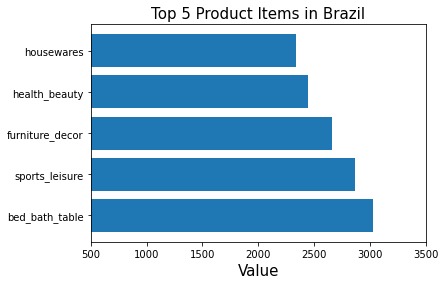

In [195]:
# Step 5.
top_five_products = {'bed_bath_table':3029,'sports_leisure':2867,'furniture_decor':2657,'health_beauty':2444,'housewares':2335}

Product = list(top_five_products.keys())
Value = list(top_five_products.values())

Products = ['bed_bath_table', 'sports_leisure', 'furniture_decor', 'health_beauty', 'housewares']
Value = [3029, 2867, 2657, 2444, 2335]
plt.title("Top 5 Product Items in Brazil", fontsize=15)
plt.xlabel('Value', fontsize=15)
plt.xlim(500, 3500)
plt.barh(Products, Value)
plt.show()

# Conclusion 1.

Based from the data, you can see that the main products ordered in Brazil from 2016 to 2018 falls under the category of `bed_bath_table category`, `furniture_decor`, and `housewares.`\
These data show us that consumers are buying and ordering items for household purposes, either as a display or utility purpose.

In addition, consumers are ordering products for sports activities, and there was a high demand of health and beauty products during this 3 year period.

# Scenario B:

Your analysis helped the Supply Chain Manager in creating new policies on their stock control. Well done!

Now, the Purchasing department would like to ask for more information from the products data. They are liasing with the Logistics team to see the `delivery performance` of `Supermercado Zona Sul`. Based from the given data, they wanted to look on the status orders of each products ordered online. You are requested to investigate on each status, and to show your findings in a graph. 



`Task 2`- create a data visualization according to the status orders.
check their product line inventory and create a stock update on their inventory system. They want to find out what product items do they need to increase their orders. Your team in Canada would like to ask for your help to translate the product names into English. 


### Question 2. 
2a. How many products were unavailable in Brazil?\
2b. How many products were delivered and canceled?

You are given the product datasets in csv form. Let's get into it.

## Let's begin by loading our first data set.

Step 1. Load the order items dataset from `.orders_dataset.csv` \
Step 2. Get all the information about the order items. \
Step 3. Get all the count of all status in `order_status`.\
Step 4. Create a Histogram for the delivery performance of products.\
Step 5. Create a Bar Chart to compare the Delivered Orders, Canceled Orders and Unavailable Orders.


### Function

The function `pandas.read_csv('filepath/filename')` is used to load a csv file to panda.

In [196]:
#Step 1. 
orders_df = pd.read_csv('../Session 8/EDA/orders_dataset.csv')

# orders_df.info()
# orders_df.columns
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,7/9/2017 21:57,7/9/2017 22:10,7/11/2017 14:58,7/26/2017 10:57,8/1/2017 0:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,4/11/2017 12:22,4/13/2017 13:25,NaN,NaN,5/9/2017 0:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,5/16/2017 13:10,5/16/2017 13:22,5/22/2017 10:07,5/26/2017 12:55,6/7/2017 0:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1/23/2017 18:29,1/25/2017 2:50,1/26/2017 14:16,2/2/2017 14:08,3/6/2017 0:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,7/29/2017 11:55,7/29/2017 12:05,8/10/2017 19:45,8/16/2017 17:14,8/23/2017 0:00


In [197]:
#Step 2. 

Created = orders_df['order_status'].value_counts()['created']
Approved = orders_df['order_status'].value_counts()['approved']
Invoiced = orders_df['order_status'].value_counts()['invoiced']
Processing = orders_df['order_status'].value_counts()['processing']
Shipped = orders_df['order_status'].value_counts()['shipped']
Delivered = orders_df['order_status'].value_counts()['delivered']
Canceled = orders_df['order_status'].value_counts()['canceled']
Unavailable = orders_df['order_status'].value_counts()['unavailable']

In [198]:
### Q2. How many products were unavailable in Brazil?
### Q2a. How many products were delivered and canceled?

print("Created:",Created)
print()
print("Approved:",Approved)
print()
print("Invoiced:",Invoiced)
print()
print("Processing:",Processing)
print()
print("Shipped:",Shipped)
print()
print("Delivered:",Delivered)
print()
print("Canceled:", Canceled)
print()
print("Unavailable:", Unavailable)

Created: 5

Approved: 2

Invoiced: 314

Processing: 301

Shipped: 1107

Delivered: 96478

Canceled: 625

Unavailable: 609


In [199]:
# Step 3. 
Status = {'Created': 5, 'Approved': 2, 'Invoiced': 314, 'Processing': 301, 'Shipped': 1107, 'Delivered': 96478, 'Canceled': 625, 'Unavailable': 609}

status_update = list(Status.keys())
status_count = list(Status.values())
print(status_update)
print(status_count)

['Created', 'Approved', 'Invoiced', 'Processing', 'Shipped', 'Delivered', 'Canceled', 'Unavailable']
[5, 2, 314, 301, 1107, 96478, 625, 609]


## Observation 2.
As you pull out the data for status, you found out that there are `4 stages of Shipping`. Once a product is ordered online,  it goes into 4 stages, before it can be received by the consumer. A order created online will be approved by the sales team, then it will be invoiced by finance team, which will be processed by the packaging team and endorsed to logistics team for shipment.

You wanted to know if iprocesses for shipping is efficient or if it needs to be improved.

### Let us visualize our answers through a histogram. 

A `histogram` is very similar to bar charts. It represents the frequency distribution of variables in a data set and can help an audience see and understand quickly and easily essential meanings and patterns related to a large amount of data.\
They can be a benefit to a company's or organization's process of decision-making in various departments.\
Let us use bar plot using `matplotlib` shows comparisons among discrete categories.

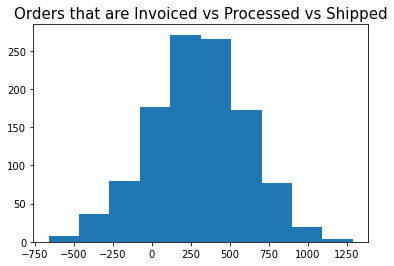

In [200]:
# Step 4.
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(314, 301, 1107)
plt.title("Orders that are Invoiced vs Processed vs Shipped", fontsize=15)


plt.hist(x)
plt.show()

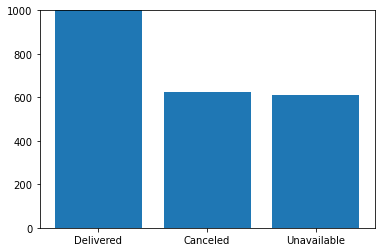

In [201]:
# Step 5. 
## Question 2. 
###2a. How many products were unavailable in Brazil?
###2b. How many products were delivered and canceled?


status = ['Delivered', 'Canceled', 'Unavailable']
number = [96478, 625, 609]
plt.ylim(0, 1000)
plt.bar(status, number)
plt.show()

# Conclusion 2.

Based from the data, you can see that there were 625 canceled orders and 609 unavailable products ordered in `Supermercado Zona Sul` from 2016 to 2018. 

The Purchasing Department can investigate more about the factors of canceled orders by reaching out to the Logistics Team, and inquire for the products that are being demanded by the customers that `Supermercado Zona Sul` are not able to deliver. Perhaps the Sales and Customer Service Team can consider looking out for product line alternatives, when a product is unavailable.

# Scenario C:
The Logistics Team have reached out to you once again, if their delivery process needs improvement. 

During this time, there was a great pandemic hitting Rio de Janiero, and the team is concerned, on how they can optimize their delivery by looking on their lead time. Your task is very crucial, as this will affect their online operations, when the physical store needs to be closed. 

### Question 3. 
3a. Base from delivered orders, identify the lead time delivery per day.\
3b. How many days was the longest lead time delivered?\
`Task 3`- Add a column spliting the date and time of the purchase date and delivery date.


You will work with the orders datasets that was given to you earlier. Let's get this done.

## Let's begin by loading our first data set.

Step 1. Load the order items dataset from `.orders_dataset.csv` \
Step 2. Split the date and time for `order_purchase_timestamp` and `'order_delivered_customer_date'`.\
Step 3. Get the lead time.\

### Function

The to_datetime() function is used to convert argument to datetime.

In [202]:
#Step 1. 
orders_df = pd.read_csv('../Session 8/EDA/orders_dataset.csv')

In [203]:
#Step 2
orders_df['order_date'] = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.date
orders_df['delivery_date'] = pd.to_datetime(orders_df['order_delivered_customer_date']).dt.date

In [204]:
#Step 3.
orders_df['lead_time'] = orders_df['delivery_date'] - orders_df['order_date']
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_date,delivery_date,lead_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10-02,2017-10-10,8 days
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-07-24,2018-08-07,14 days
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,2018-08-08,2018-08-17,9 days
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,2017-11-18,2017-12-02,14 days
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,2018-02-13,2018-02-16,3 days
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,7/9/2017 21:57,7/9/2017 22:10,7/11/2017 14:58,7/26/2017 10:57,8/1/2017 0:00,2017-07-09,2017-07-26,17 days
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,4/11/2017 12:22,4/13/2017 13:25,NaN,NaN,5/9/2017 0:00,2017-04-11,NaT,NaT
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,5/16/2017 13:10,5/16/2017 13:22,5/22/2017 10:07,5/26/2017 12:55,6/7/2017 0:00,2017-05-16,2017-05-26,10 days
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1/23/2017 18:29,1/25/2017 2:50,1/26/2017 14:16,2/2/2017 14:08,3/6/2017 0:00,2017-01-23,2017-02-02,10 days
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,7/29/2017 11:55,7/29/2017 12:05,8/10/2017 19:45,8/16/2017 17:14,8/23/2017 0:00,2017-07-29,2017-08-16,18 days


In [205]:
# Step 4.
delivered_df = orders_df[(orders_df["order_status"]=="delivered")]
# delivered_df.head(10)
delivery_lead_time = delivered_df[["order_status","lead_time"]]
delivery_lead_time.sort_values(by='lead_time', ascending=False).head(10)

,order_status,lead_time
19590,delivered,210 days
55619,delivered,208 days
61610,delivered,196 days
70307,delivered,195 days
89130,delivered,195 days
38509,delivered,194 days
11399,delivered,191 days
81401,delivered,190 days
54480,delivered,188 days
68769,delivered,188 days


# Conclusion 3.

The results showed that 210 days was the longest lead time the Logistics team of `Supermercado Zona Sul` managed to deliver an online purchase. You forwarded this data to the Senior Purchasing officer and upon checking, you think it needs more time to investigate on this. 

There was a pilferage incident that happened 5 years ago, but there was no data given to you. You immediately called for a team meeting with the Purchasing and Logistics Team to present your findings, where you highlight that there are products in `Supermercado Zona Sul` that were only delivered between 2 - 6 months lead time, negatively affect sales and manufacturing processes.

Your final feedback is to look into the delivery process, streamline the operations, automate work flows, which will improve productivity, increasing output and revenue. 